In [172]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

import scipy.stats as stats

from scipy.stats import zscore

pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

# Part A:
CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
- DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
- PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

## Part A.1: Data understanding
### Q.A.1.A Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [173]:
df_normal = pd.read_csv('Normal.csv')
df_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [174]:
df_typeh = pd.read_csv('Type_H.csv')
df_typeh.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [175]:
df_types = pd.read_csv('Type_S.csv')
df_types.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### Q.A.1.B :Print Shape and columns of all the 3 DataFrames.

In [176]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [177]:
df_typeh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [178]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [179]:
print("Df_Normal Shape = ",df_normal.shape)
print("Df_TypeH Shape = ",df_typeh.shape)
print("Df_TypeS Shape = ",df_types.shape)

Df_Normal Shape =  (100, 7)
Df_TypeH Shape =  (60, 7)
Df_TypeS Shape =  (150, 7)


In [180]:
print("Df_Normal Columns = ",df_normal.columns)
print("Df_TypeH Columns = ",df_typeh.columns)
print("Df_TypeS Columns = ",df_types.columns)

Df_Normal Columns =  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Df_TypeH Columns =  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Df_TypeS Columns =  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### Q.A.1.C Observations:
- All three dataframes have unequal lenths in terms of number of rows and we cannot use df.compare to compare the dataframes.
- All the first six columns('P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree')  are same in all three dataframes.
- Only Class column is different for all three dataframes namingly 'Normal', 'Type-H', 'Type-S'



### Q.A.1.D : Print DataTypes of all the 3 DataFrames

In [181]:
print("Df_Normal Columns = ",df_normal.info())
print("Df_TypeH Columns = ",df_typeh.info())
print("Df_TypeS Columns = ",df_types.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
Df_Normal Columns =  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6 

### Q.A.1.E : Observe and share variation in ‘Class’ feature of all the 3 DataFrames.

In [182]:
df_normal['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [183]:
df_typeh['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [184]:
df_types['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

#### Observations:
- 'Class' column values seems to have discrepency in lebelling/value. Class Normal has some values as Nrmal, some has type_h instead of Type_H, some has tp_s instead of Type_S. 
- This needs to be unified to have same class values for that particular class label with values as Normal, Type_H, Type_S

 ### Q.A.2.A Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [185]:
df_normal['Class'].replace('Nrmal', 'Normal', inplace=True)

In [186]:
df_typeh['Class'].replace('type_h', 'Type_H', inplace=True)

In [187]:
df_types['Class'].replace('tp_s', 'Type_S', inplace=True)

In [188]:
df_normal['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

In [189]:
df_typeh['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

In [190]:
df_types['Class'].value_counts()

Type_S    150
Name: Class, dtype: int64

### Q.A.2.B Combine all the 3 DataFrames to form a single DataFrame

In [191]:
df = pd.concat([df_normal, df_typeh, df_types], ignore_index=True, sort=False)

In [192]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [194]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

### Q.A.2.C Print 5 random samples of this DataFrame 

In [195]:
df_sample = df.sample(n=5)
df_sample

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
175,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,Type_S
75,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,Normal
250,81.112605,20.690444,60.687006,60.422161,94.018783,40.510982,Type_S
48,40.349296,10.194748,37.967747,30.154548,128.009927,0.458901,Normal
49,63.619192,16.934508,49.349262,46.684684,117.089747,-0.357812,Normal


In [196]:
df_sample = df.sample(n=5)
df_sample

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
274,61.411737,25.384364,39.096869,36.027373,103.404597,21.843407,Type_S
297,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Type_S
84,46.236399,10.062770,37.000000,36.173629,128.063620,-5.100053,Normal
126,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,Type_H
157,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H


### Q.A.2.D Print Feature-wise percentage of Null values

In [197]:
df. isnull(). sum() * 100 / len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

### Q.A.2.E Check 5-point summary of the new DataFrame

In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### Q.A.3.A Visualize a heatmap to understand correlation between all features

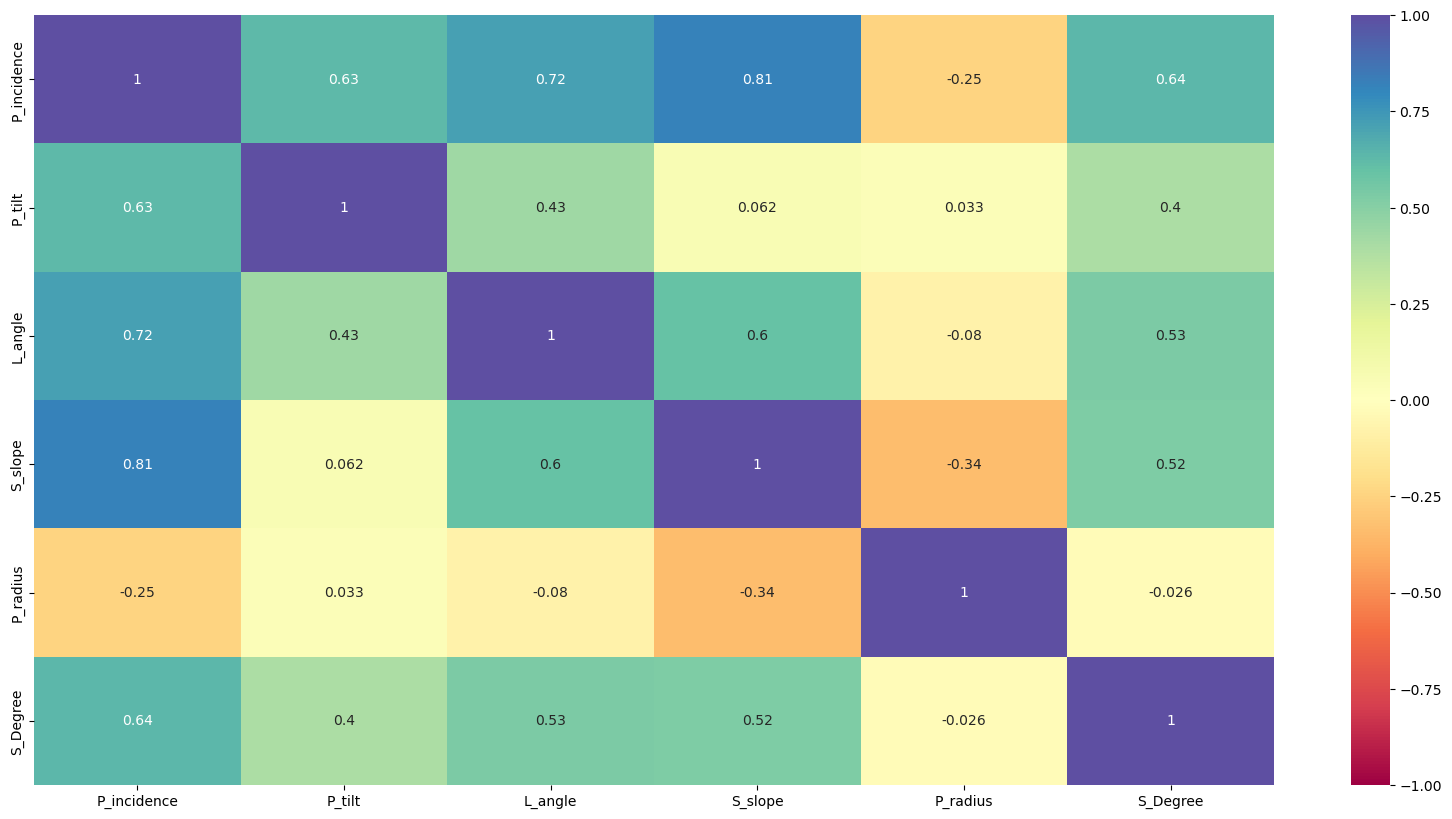

In [199]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);
plt.show()

### Q.A.3.B Share insights on correlation
- There is strong positive correlation(81%) between P_incidence and S_Slope features.
- There is very good positive correlation(72%) between P_incidence and L_angle.
- There is good positive correlation between P_incidence and S_Degree with 64%, between P_incidence and P_tilt at 63%.
- There is no correlation between P_radius and S_Degree at 2.6%, P_radius and P_tilt at 3.3%
- There is highest negative correlation between P_radius and S_Slope at 34%.

### Q.A.3.C Visualize a pairplot with 3 classes distinguished by colors and share insights.

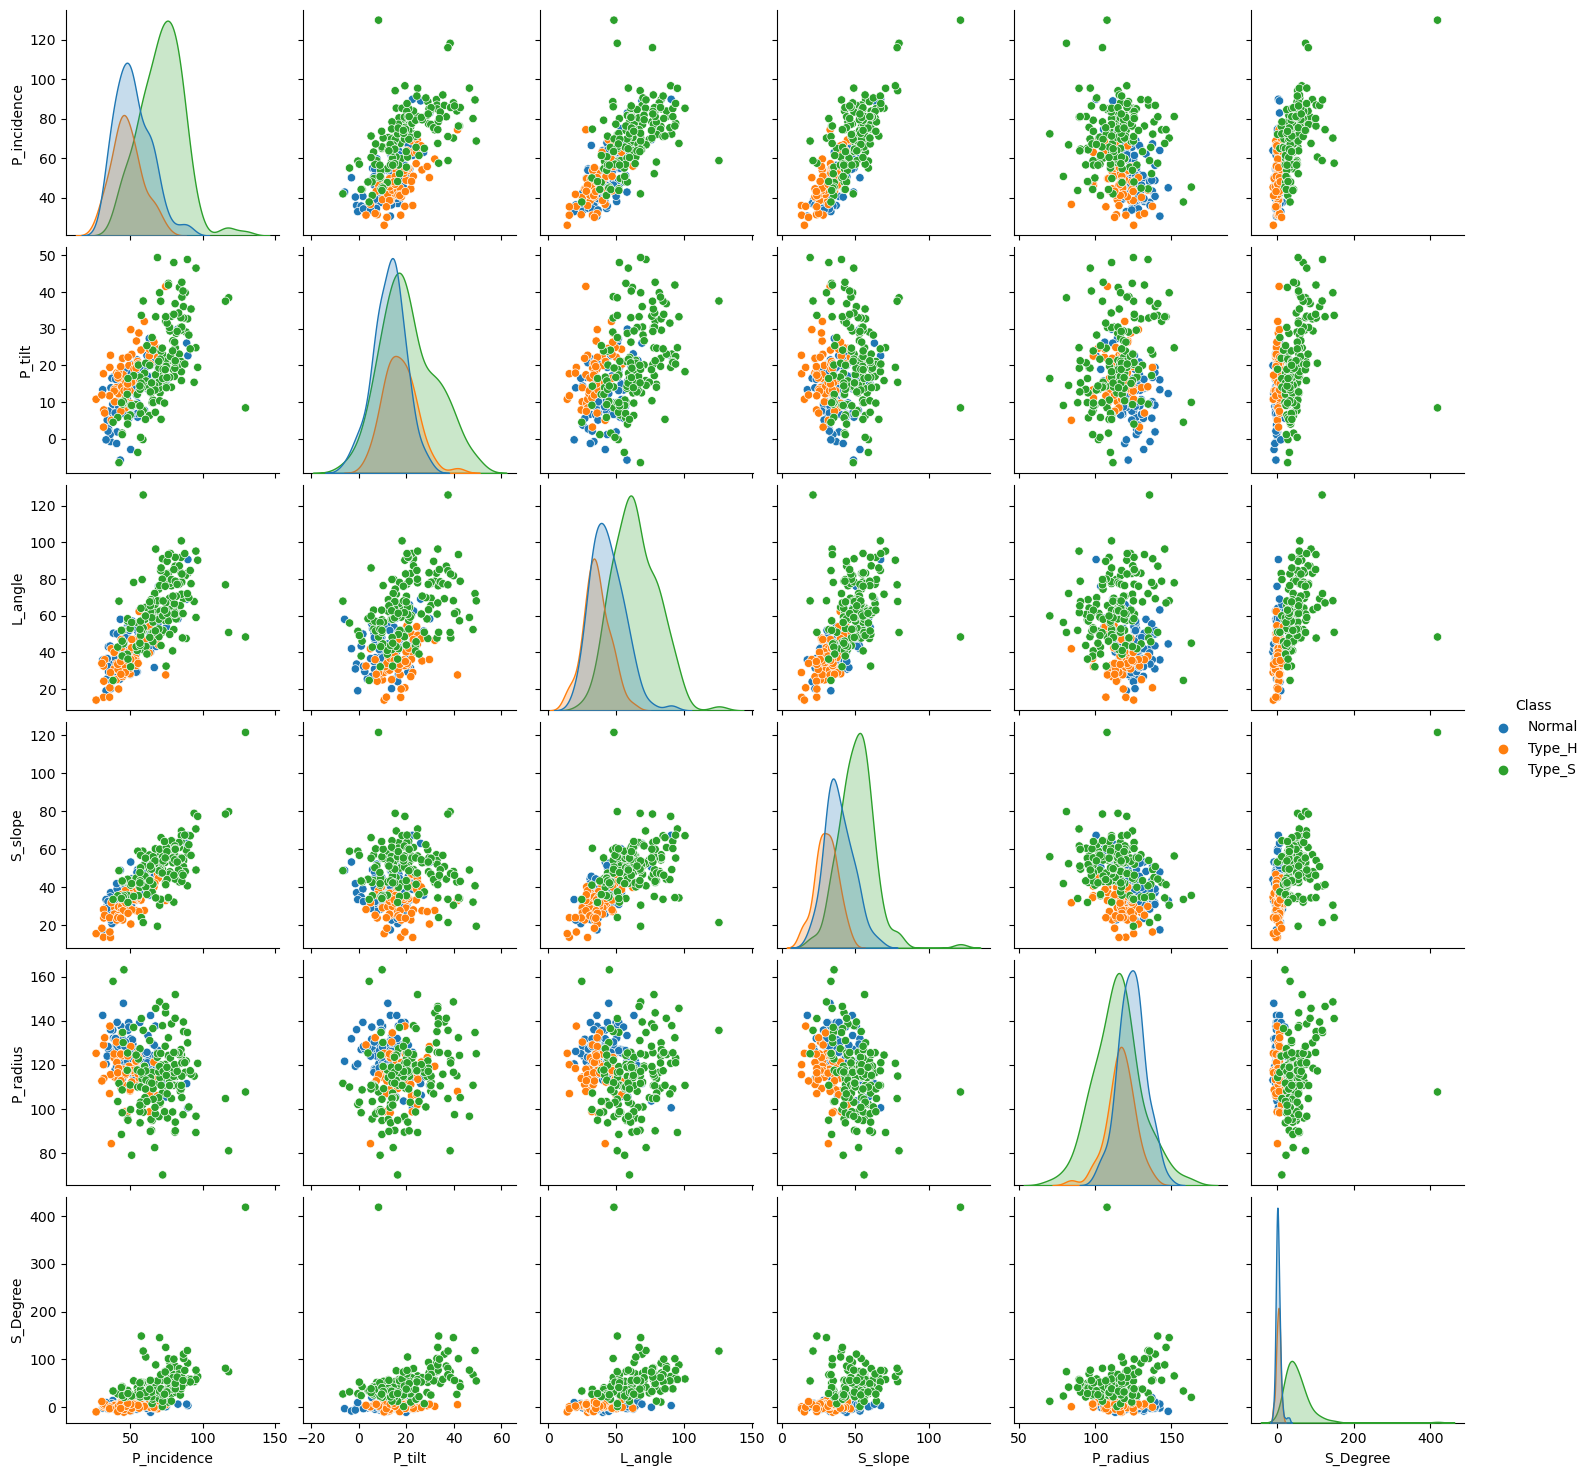

In [200]:
sns.pairplot(data=df, hue='Class');
plt.show();

#### Insights
- Along the diagonals, Type-S has maximum spread and Type-H has lowest spread.
- Along the diagonals, Normal Class has highest peak in most of the cases.
- Class Type-S has more number of samples and Class Normal has least number of samples.

### Q.A.3.D Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. 

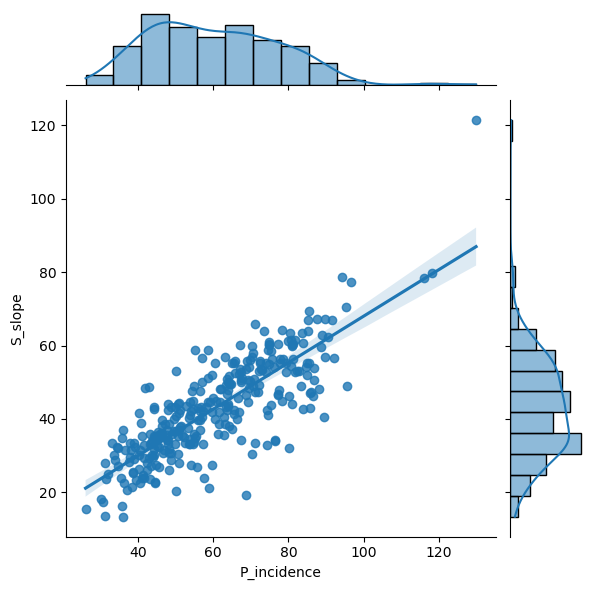

In [201]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', kind='reg');

Insights
- Can see strong positive correlation between P_incidence and S_Slope.
- Both P_incidence and S_Slope follows normal distribution.

### Q.A.3.E Visualize a boxplot to check distribution of the features and share insights.

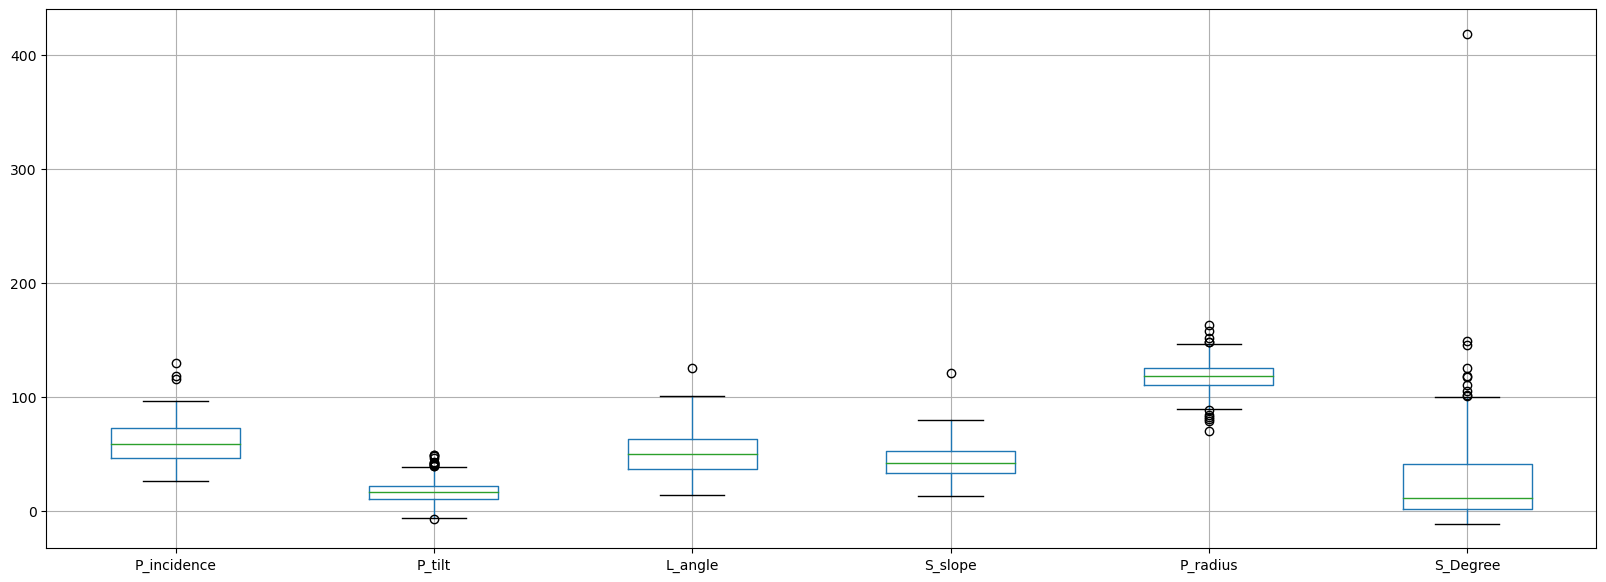

In [202]:
#b = sns.boxplot(data = df, hue='Class', x='columns', y='value');
boxplot = df.boxplot(column=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'], figsize=(20, 7));
plt.show();



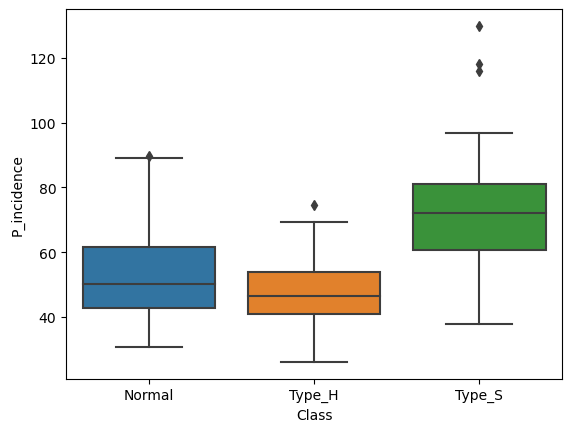

In [203]:
sns.boxplot(data=df, x='Class', y='P_incidence');

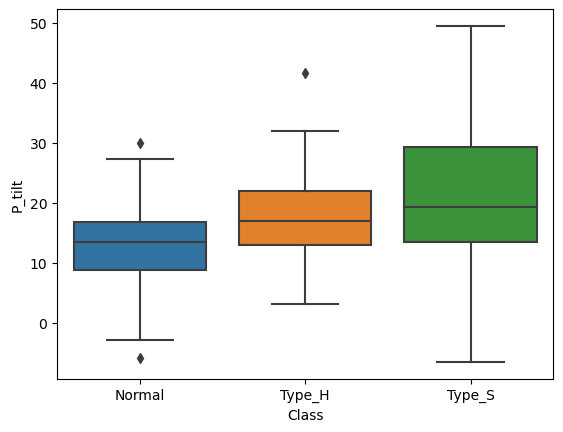

In [204]:
sns.boxplot(data=df, x='Class', y='P_tilt');

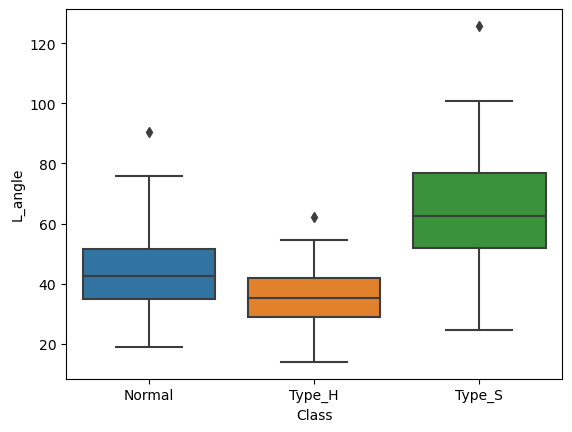

In [205]:
sns.boxplot(data=df, x='Class', y='L_angle');

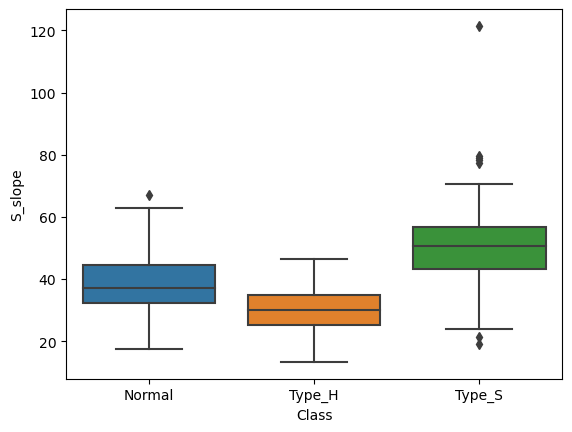

In [206]:
sns.boxplot(data=df, x='Class', y='S_slope');

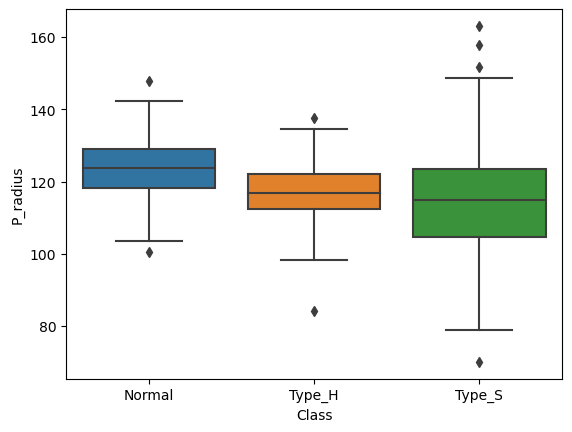

In [207]:
sns.boxplot(data=df, x='Class', y='P_radius');

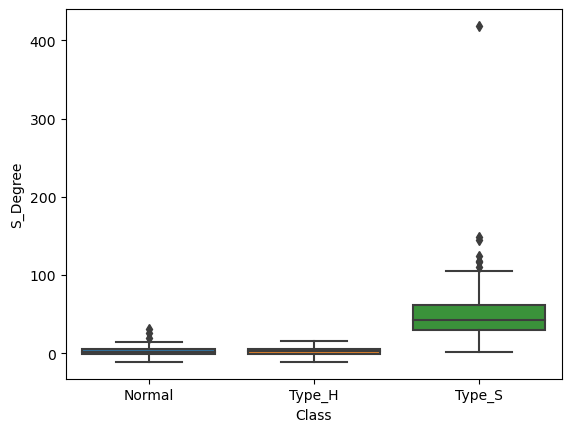

In [208]:
sns.boxplot(data=df, x='Class', y='S_Degree');

Insights
- Almost all the features/columns have outliers present.
- S_Degree and P_radius feature has highest outliers. P_radius has almost no/negligible skewness.
- L_angle and S_slope features has least spread.
- P_radius has outliers in both directions for all the three classes.
- Among all the features with three classes, Type_H Class has least or negligible skewness compared to the rest.

## Model Building
### Q.A.4.A Split data into X and Y.

In [209]:
df.groupby(["Class"]).count()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [210]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df.drop(labels= "Class" , axis = 1)
y = df["Class"]
X.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [211]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: object

### Q.A.4.B Split data into train and test with 80:20 proportion

In [212]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Q.A.4.C Train a Supervised Learning Classification base model using KNN classifier.

In [213]:
NNH = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')

In [214]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [215]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8387096774193549

#### Q.A.4.D Print all the possible performance metrics for both train and test data.

In [216]:
print('Accuracy on Training data:',NNH.score(X_train, y_train) )
print('Accuracy on Test data:',NNH.score(X_test, y_test) )


Accuracy on Training data: 0.8911290322580645
Accuracy on Test data: 0.8387096774193549


In [217]:
print(classification_report(predicted_labels, y_test))

              precision    recall  f1-score   support

      Normal       0.89      0.67      0.76        24
      Type_H       0.64      0.88      0.74         8
      Type_S       0.88      0.97      0.92        30

    accuracy                           0.84        62
   macro avg       0.80      0.84      0.81        62
weighted avg       0.85      0.84      0.84        62



#### With Eucledian metrics, we see training accuracy at 89% and testing accuracy at 83% which seems to be good.

Confusion Matrix


<Axes: >

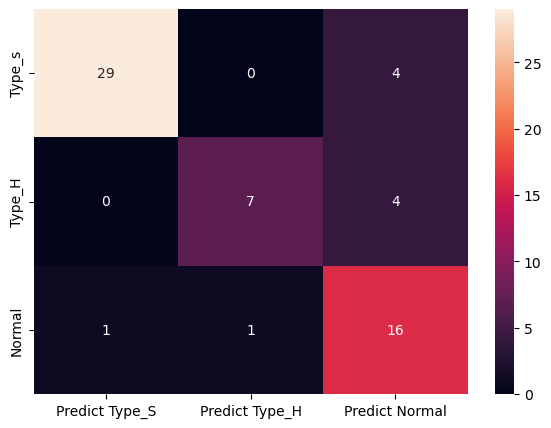

In [218]:
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Type_S", "Type_H","Normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Type_s", "Type_H","Normal"]],
                  columns = [i for i in ["Predict Type_S", "Predict Type_H","Predict Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Q.A.4.D Experiment with various parameters to improve performance of the base model.

##### Earlier we used eucledian metrics for building the model. Lets try to use standard Weights as Distance and see how model performs.


In [219]:
# Split X and y into training and test set in 80:20 ratio

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [220]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [221]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [222]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8548387096774194

In [223]:
print('Accuracy on Training data:',NNH.score(X_train, y_train) )
print('Accuracy on Test data:',NNH.score(X_test, y_test) )

Accuracy on Training data: 1.0
Accuracy on Test data: 0.8548387096774194


### Q.A.5 Performance Improvement:
- A. Experiment with various parameters to improve performance of the base model.
- B. Clearly showcase improvement in performance achieved.
- C. Clearly state which parameters contributed most to improve model performance.

### Cross validation methods to improve performance on base model:
- Run the KNN with no of neighbours to be 1,3,5..19 and find the optimal number of neighbours from the above list using the Mis classification error.
- Misclassification error (MSE) = 1 - Test accuracy score. Calculate MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE.

In [224]:
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))


In [225]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....29
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    #knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    print(f'The accuracy score with k value {k} is {accuracy_score(y_test, y_pred)}')
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The accuracy score with k value 1 is 0.9032258064516129
The accuracy score with k value 3 is 0.8548387096774194
The accuracy score with k value 5 is 0.8387096774193549
The accuracy score with k value 7 is 0.8225806451612904
The accuracy score with k value 9 is 0.8064516129032258
The accuracy score with k value 11 is 0.7903225806451613
The accuracy score with k value 13 is 0.7903225806451613
The accuracy score with k value 15 is 0.7903225806451613
The accuracy score with k value 17 is 0.8387096774193549
The accuracy score with k value 19 is 0.8225806451612904
The accuracy score with k value 21 is 0.8387096774193549
The accuracy score with k value 23 is 0.8064516129032258
The accuracy score with k value 25 is 0.7903225806451613
The accuracy score with k value 27 is 0.8064516129032258
The accuracy score with k value 29 is 0.8064516129032258
The optimal number of neighbors is 1


#### Plot accuracy vs K-Values

Text(0, 0.5, 'Accuracy Score')

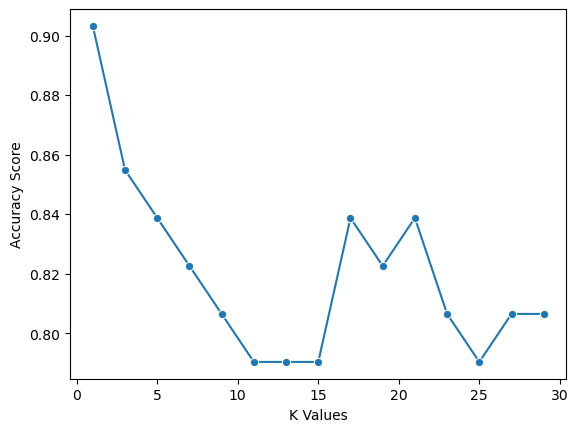

In [226]:
sns.lineplot(x = neighbors, y = ac_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [227]:
best_index = np.argmax(ac_scores)
best_k = neighbors[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [228]:
y_pred = knn.predict(X_test)


print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

      Normal       0.94      0.81      0.87        21
      Type_H       0.73      0.89      0.80         9
      Type_S       0.94      0.97      0.95        32

    accuracy                           0.90        62
   macro avg       0.87      0.89      0.88        62
weighted avg       0.91      0.90      0.90        62



### Conclusions
- With Minkowski distance model(weights as distance), model is overfitting and cannot be considered.
- With Euclidean distance model, model performance seems to be good with accuracy score at 83.8% with k value as 5.
- Performing the cross validation with various k values(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29), it was found the accuracy score is really good with K value as 1 (accuracy score 90%) while the performance is poor with k values 11,13,15,25.
- Plotted Accuracy Score vs K-values using lineplot.
- Overall with K value as 1 and Eucliedean distance method, performance seems to be optimal for the given data.
- Since the data has very few outliers, we havent done outlier treatment(by imputing with mean values). Also the accuracy seems to be very good.

## PART B:
 - DOMAIN: Banking, Marketing
 - CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 
 - PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

#### Q.B.1.A Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [229]:
df1 = pd.read_csv('Data1.csv')
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [230]:
df2 = pd.read_csv('Data2.csv')
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


#### Q.B.1.B.Print shape and Column Names and DataTypes of both the Dataframes

In [231]:
df1.shape

(5000, 8)

In [232]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [233]:
df2.shape

(5000, 7)

In [234]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


#### Q.B.1.C Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [235]:
df = pd.merge(df1, df2, on="ID", how="left") 

In [236]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


#### It seems Customer Since feature has negative values with min as -3 and max 43 which seems to be an error during saving. Lets understand the data with these negative values more.

In [238]:
# Checking count of negative values in Experience
df.loc[df['CustomerSince'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
CustomerSince,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
HighestSpend,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZipCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
HiddenScore,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
MonthlyAverageSpend,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Level,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Security,52.0,0.115385,0.322603,0.0,0.00,0.0,0.000,1.0


In [239]:
df['CustomerSince'].median()

20.0

In [240]:
df.loc[df['CustomerSince'] < 0]['Age'].median()

24.0

##### Its been observed that for CustomerSince feature whose values are negative in the dataset has people with Age range of 23-29 with median and mean close to 24. These group of people who are marked negative experience in the dataset have HighestSpend ranging between 12 to 150, they didn't take Loan against card that was offered to them in the earlier campaign. These customers also dont have Fixed Deposit Account with the bank. Using these observations, we can impute negative values in CustomerSince Feature.


In [241]:
impute_value = df.loc[(df['Age'] > 23) & (df['Age'] <= 29) & (df['HighestSpend'] > 12) & (df['HighestSpend'] < 150) & 
         (df['LoanOnCard'] == 0) & (df['FixedDepositAccount'] == 0), 'CustomerSince'].median()
impute_value

2.0

In [242]:
# replace the negative values with 2
df['CustomerSince'] = np.where(df['CustomerSince'] < 0, impute_value, df['CustomerSince'])

In [243]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.140400,11.405644,0.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [244]:
df['CustomerSince'].median()

20.0

#### Its been observed that post imputation, Mean value change for CustomerSince feature is negligible (20.1 to 20.14) and median stays unchanged(20.0).

#### Q.B.1.D Change Datatype of below features to ‘Object’ 
- ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [245]:
 #Make a copy of the original data frame.
data = df.copy(deep=True)
data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 585.9 KB


In [247]:
data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype(str)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 585.9+ KB


#### Q.B.2.A  Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [249]:
data['LoanOnCard'].apply(type).value_counts()

<class 'float'>    5000
Name: LoanOnCard, dtype: int64

In [250]:
data.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

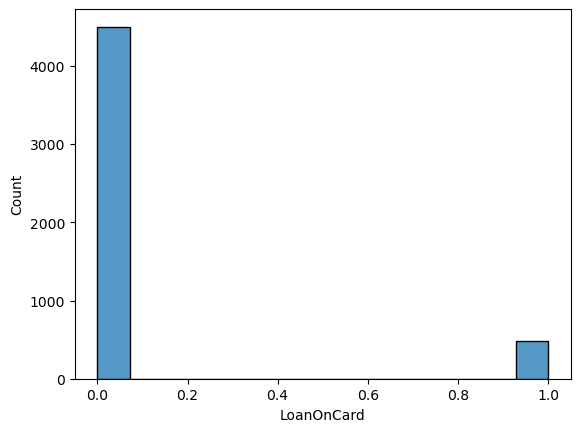

In [251]:
sns.histplot(data=data, x='LoanOnCard');

In [252]:
data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [253]:
# extracting all the information of other variable where LoanOnCard is null
data.loc[df['LoanOnCard'].isnull()==True]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13.0,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27.0,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24.0,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10.0,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26.0,19,94720,2,0.4,1,118,0,0,1,0,NaN


#### Insights
- LoanOnCard feature has 20 nulll/missing values.
- There are 4500 values as zeroes and 480 values as ones.

#### Q.B.2.B Check the percentage of missing values and impute if required.

In [254]:
data.isnull().sum() * 100 / len(df)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

#### There are no missing/null values for all features except LoanOnCard which has 0.4% in a sample of 5000. Its very small % and doesnt really need any missing values treatment like imputing(as it has almost negligible impact) but we will try imputing.
- LoanOnCard feature contains most of the values as zeroes and hence mode will be zero. We cant use mean/std deviation as it seems to be a binary variable containing 0 or 1. 
- Lets impute the missing values in LoanOnCard with mode.

In [255]:
data['LoanOnCard'] = data['LoanOnCard'].fillna(data['LoanOnCard'].mode()[0])

In [256]:
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [257]:
data['LoanOnCard'].unique()

array([0., 1.])

##### All missing values in LoanOnCard feature has been  imputed with zero(which is mode).

### Q.B.2.D Check for unexpected values in each categorical variable and impute with best suitable value.

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 585.9+ KB


In [259]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.140400,11.405644,0.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
LoanOnCard,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### zipcode has min value as 9307 and max 96651. Seems valid pincodes has 5 digits and hence 9307(4-digit) is a wrong entry and this row can be deleted.

In [260]:
data[data['ZipCode'] < 10000]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
384,385,51,25.0,21,9307,4,0.6,3,0,0,0,1,1,0.0


#### Row 384 with ID:385 can be deleted as it contains wrong pincode. Since its only one row with wrong entry, its absolutely fine to delete the entire row.

In [261]:
# dropping index 384
data.drop(384, axis = 0, inplace = True)

In [262]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4999.0,2500.923185,1443.354188,1.0,1251.5,2501.0,3750.5,5000.0
Age,4999.0,45.337267,11.464033,23.0,35.0,45.0,55.0,67.0
CustomerSince,4999.0,20.139428,11.406577,0.0,10.0,20.0,30.0,43.0
HighestSpend,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
ZipCode,4999.0,93169.275455,1759.630610,90005.0,91911.0,93437.0,94608.0,96651.0
MonthlyAverageSpend,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
LoanOnCard,4999.0,0.096019,0.294647,0.0,0.0,0.0,0.0,1.0


In [263]:
data['HiddenScore'].unique()

array(['4', '3', '1', '2'], dtype=object)

In [264]:
data['Level'].unique()

array(['1', '2', '3'], dtype=object)

In [265]:
data['Security'].unique()

array(['1', '0'], dtype=object)

In [266]:
data['FixedDepositAccount'].unique()

array(['0', '1'], dtype=object)

In [267]:
data['InternetBanking'].unique()

array(['0', '1'], dtype=object)

In [268]:
data['CreditCard'].unique()

array(['0', '1'], dtype=object)

In [269]:
# Check unique values for categorical columns
columns = ['ZipCode', 'HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']
data[columns].nunique()

ZipCode                466
HiddenScore              4
Level                    3
Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
dtype: int64

#### Visualize the data with pairplot

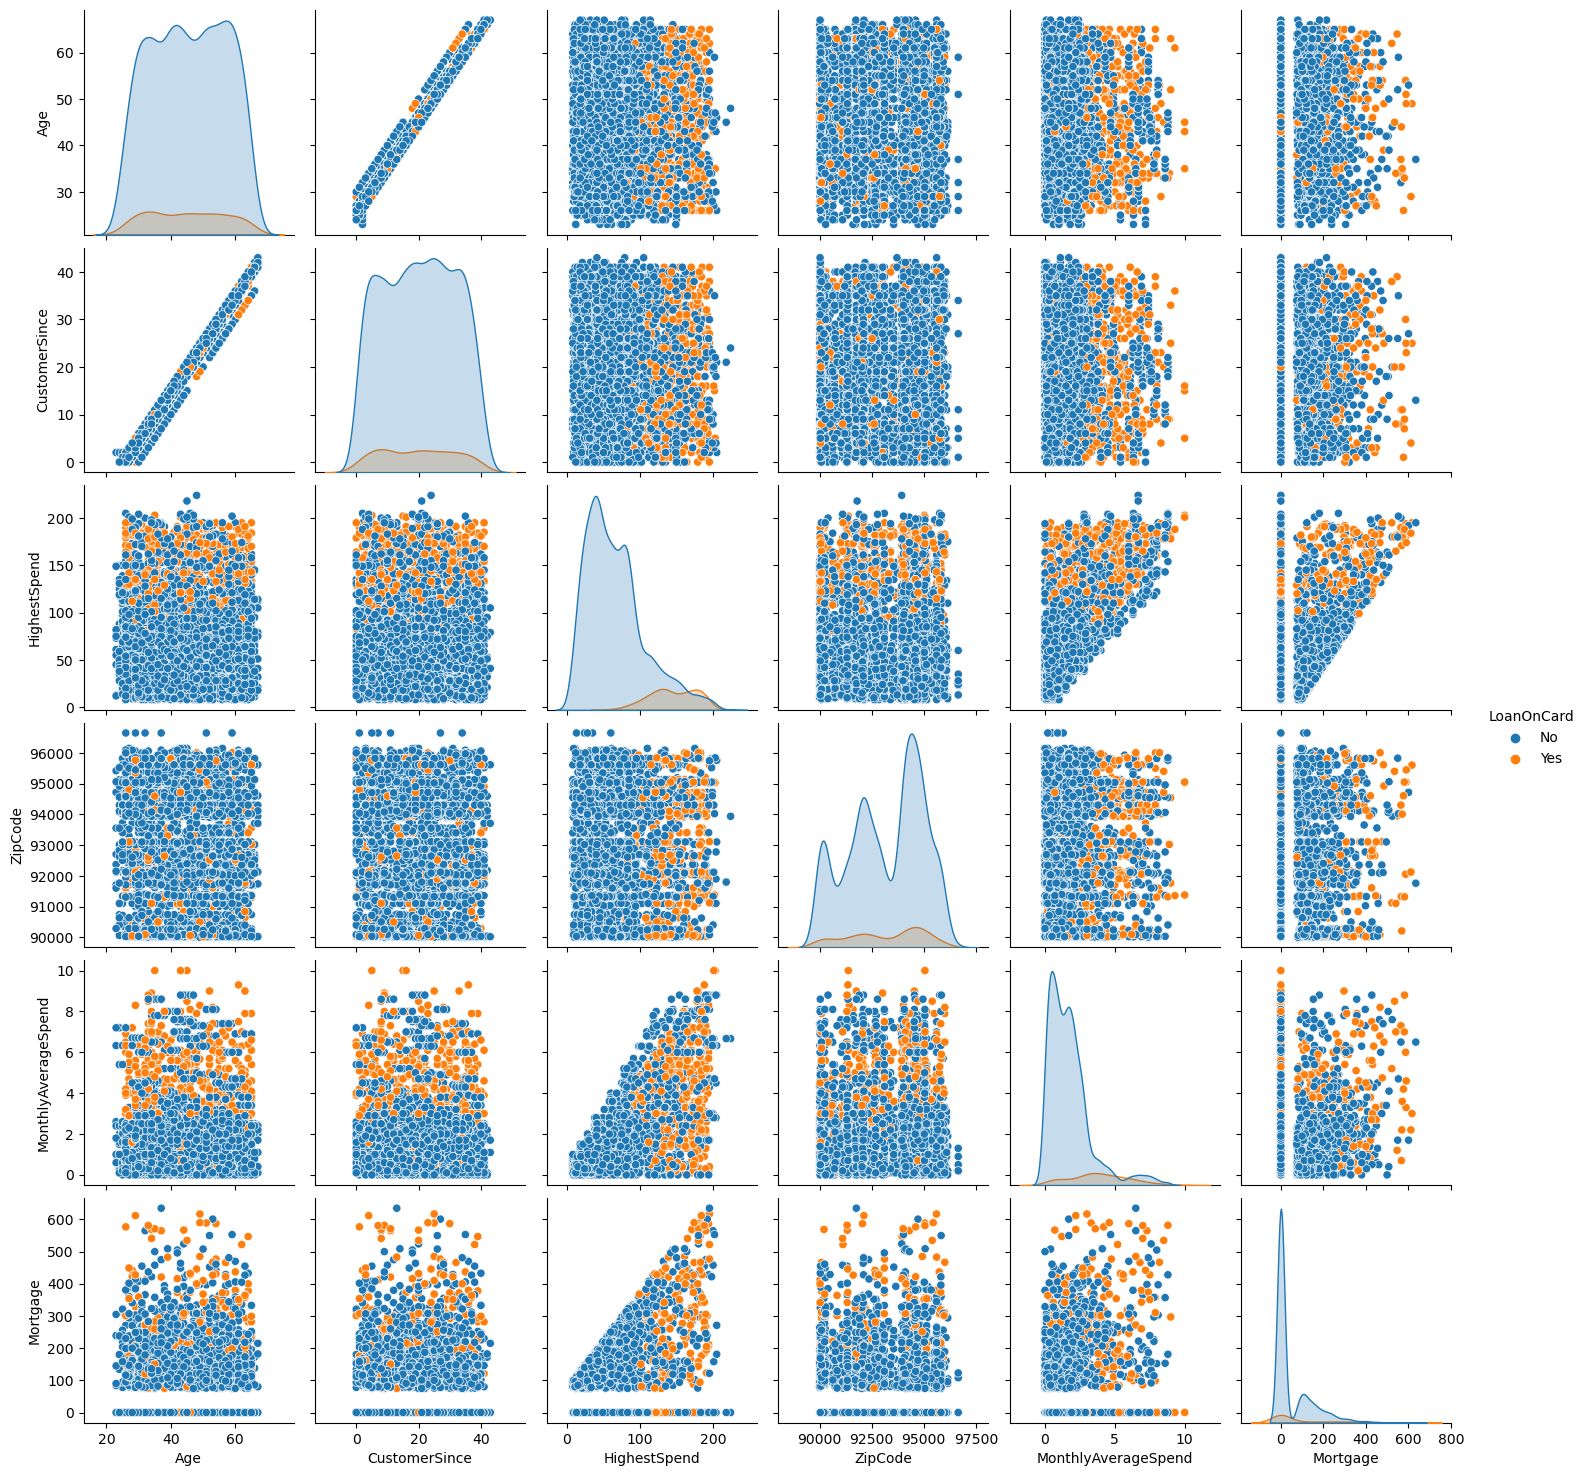

In [270]:
# Pairplot
pairplot = data.drop('ID', axis = 1)
pairplot['LoanOnCard'] = pairplot['LoanOnCard'].replace({0: 'No', 1: 'Yes'});
sns.pairplot(pairplot, hue = 'LoanOnCard');

#### We can delete ID and ZipCode as these doesnt have any relevance to LoanonCard offering from Bank to Customer and is not any interesting information for building the models.

In [271]:
data.drop(['ID', 'ZipCode'], axis = 1, inplace = True)
data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1.0,49,4,1.6,1,0,1,0,0,0,0.0
1,45,19.0,34,3,1.5,1,0,1,0,0,0,0.0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0.0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0.0
4,35,8.0,45,4,1.0,2,0,0,0,0,1,0.0


In [272]:
data['LoanOnCard'].value_counts(normalize = True)#.plot(kind = 'bar') #Imbalanced 1 >65%

0.0    0.903981
1.0    0.096019
Name: LoanOnCard, dtype: float64

#### Minority class is 0 -- 9.6%, 1 - 90.3%% (majority class) # In corporate, >65%-<35% imbalanced (0-1 prop = 35%-65%). Data seems to be highly imbalanced.


### Data Preparation and model building:
#### Q.B.3.A Split data into X and Y. 

In [273]:
data.groupby(["LoanOnCard"]).count()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
LoanOnCard,,,,,,,,,,,
0.0,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519
1.0,480,480,480,480,480,480,480,480,480,480,480


In [274]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = data.drop(labels= "LoanOnCard" , axis = 1)
y = data["LoanOnCard"]
X.head()


,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1.0,49,4,1.6,1,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1


In [275]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LoanOnCard, dtype: float64

In [276]:
X_train.shape, X_test.shape

((248, 6), (62, 6))

#### Q.B.3.B Split data into train and test. Keep 25% data reserved for testing.

In [277]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3749, 11)

(1250, 11)

(3749,)

(1250,)

#### Q.B.3.C Train a Supervised Learning Classification base model using Logistic Regression. 

In [278]:
from sklearn.linear_model import LogisticRegression


In [279]:
#Build the logistic regression model
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100)
print(logisticRegr)

LogisticRegression()


In [280]:
logisticRegr.fit(X_train, np.ravel(y_train)) # fit -- training the model - it tries to find out the beta coeff

LogisticRegression()

In [281]:
# Use score method to get accuracy of model
training_score = logisticRegr.score(X_train, y_train)
print(training_score) # (TP+TN)/(TP+TN+FP+FN) - accuracy

0.9490530808215524


In [282]:
logisticRegr.coef_

array([[-4.85101746e-01,  4.88338689e-01,  4.93330178e-02,
         5.77678295e-01,  1.34590690e-01,  1.64832525e+00,
         5.86927135e-04,  1.42427040e-01,  2.57355525e+00,
        -2.26190332e-01, -6.06877219e-01]])

In [283]:
logisticRegr.intercept_

array([-0.49281389])

In [284]:
# Use score method to get accuracy of model
test_score = logisticRegr.score(X_test, y_test)
print(test_score)

0.944


In [285]:
y_true, y_pred = y_test, logisticRegr.predict(X_test)
y_pred[0:5]

array([0., 0., 0., 0., 0.])

In [286]:
y_pred_prob_1 = logisticRegr.predict_proba(X_test)[:,1]
y_pred_prob_1[0:5].round(2)

array([0.  , 0.1 , 0.37, 0.  , 0.  ])

#### Q.B.3.D Print evaluation metrics for the model and clearly share insights

In [287]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve

In [288]:
mat_test = confusion_matrix(y_test,y_pred)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1111   20]
 [  50   69]]


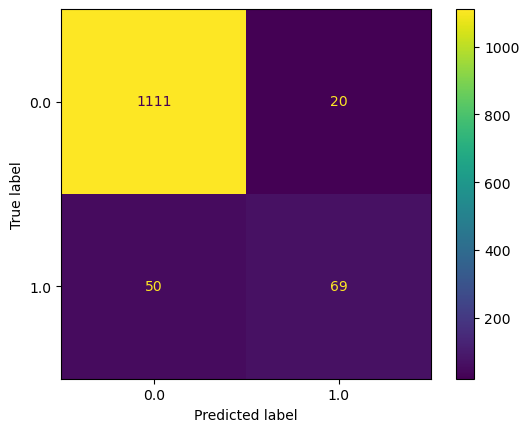

In [289]:
ConfusionMatrixDisplay(mat_test, display_labels=logisticRegr.classes_).plot()

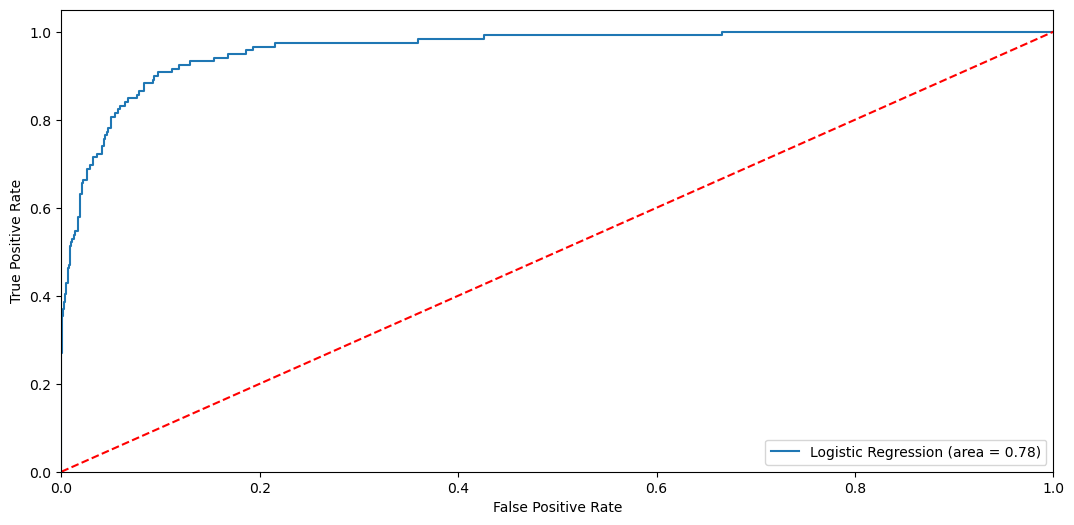

In [290]:
# ROC Curve
roc_auc = roc_auc_score(y_true, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, logisticRegr.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [291]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1131
         1.0       0.78      0.58      0.66       119

    accuracy                           0.94      1250
   macro avg       0.87      0.78      0.82      1250
weighted avg       0.94      0.94      0.94      1250



#### Insights
- Using logistic regression, we observe Training Score:94.9% Test Score:94.4% and model seems to be slightly overfitting.
- F1 score is 0.97/0.66 for 0 and 1. Seems minorty class score is less which is of important as logistic regression tend to be
  biased towards majority class and ignore minorty class leading to misclassification of minorty class which is more dangerous.
- Confusion matrix seems to be fair with only 50 and 20 values falling out of place however model has very less recall score which is a concern.
- Dataset is highly imbalanced with minority class(0) at 9.6% and majority class(1) at 90.3%. Usually anything >65% or <35% is treated as imbalanced. Expected range is 35% - 65% for 0-1.
- Dataset needs to be handled for this imbalanced data using SMOTE technique.


#### Q.B.3.E Balance the data using the right balancing technique.
- We will use SMOTE imbalancing technique.

In [292]:
import warnings
warnings.simplefilter('ignore')

In [293]:
#pip install imblearn --ignore-installed scikit-learn

In [294]:
#pip install imblearn
#conda install -c glemaitre imbalanced-learn
from imblearn import under_sampling, over_sampling

In [295]:
from imblearn.over_sampling import SMOTE

In [296]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 

Before OverSampling, counts of label '1': 480
Before OverSampling, counts of label '0': 4519 



In [297]:
sm = SMOTE(random_state = 2) 
#X_sm, y_sm = sm.fit_resample(X, np.array(Y)) 
X_sm, y_sm = sm.fit_resample(X, y.ravel()) 

In [298]:
print('After OverSampling, the shape of X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0))) 

After OverSampling, the shape of X: (6778, 11)
After OverSampling, the shape of y: (6778,) 

After OverSampling, counts of label '1': 3382
After OverSampling, counts of label '0': 3396


#### With SMOTE Technique, dataset is balanced with 3388 data samples for Label 1 and Label 0(50:50 distribution) as against 361 & 3388 earlier base model.

#### Q.B.3.F Again train the same previous model on balanced data.

In [320]:
#split into 75:25 ratio 
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 1)

In [321]:
lr1 = LogisticRegression() 
lr1.fit(X_train_sm, y_train_sm.ravel()) 
predictions = lr1.predict(X_test_sm) 
  
# print classification report 
print(classification_report(y_test_sm, predictions)) 

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      1123
         1.0       0.88      0.92      0.90      1137

    accuracy                           0.90      2260
   macro avg       0.90      0.90      0.90      2260
weighted avg       0.90      0.90      0.90      2260



#### Q.B.3.G Insights/conclusions post SMOTE balancing
- Without balancing, Accuracy was 94% and with SMOTE balancing Accuracy is at 90%.
- Without balancing, Recall was very low(58%) which is a concern and with SMOTE balancing, Recall score increased to 92% and has overall good f1-score.
- Overall without balancing it was seen model was overfitting with biased towards majority class(label:0) although accuracy was slightly better.
- With SMOTE Balancing technique, we can see model performing better with good Recall score although slight dip in Accuracy. Model doesnt seem to be overfitting.

#### Q.B.4.A Train a base model each for SVM, KNN. 

#### Lets use SVM Classification model and check model performance

In [322]:
from sklearn import svm
import sklearn.metrics as metrics

In [323]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear', gamma = 0.001, C = 10)
svc_model.fit(X_train, y_train)
svc_tr = svc_model.score(X_train, y_train)
svc_te = svc_model.score(X_test, y_test)
svc_pred = svc_model.predict(X_test)


In [324]:
print('With SVM model, Accuracy on Training data:',svc_model.score(X_train, y_train) )
print('With SVM model, Accuracy on Test data:',svc_model.score(X_test, y_test) )

With SVM model, Accuracy on Training data: 0.95492131234996
With SVM model, Accuracy on Test data: 0.948


In [325]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1131
         1.0       0.85      0.55      0.67       119

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.94      0.95      0.94      1250



In [326]:
mat_test = confusion_matrix(y_test,svc_pred)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1119   12]
 [  53   66]]


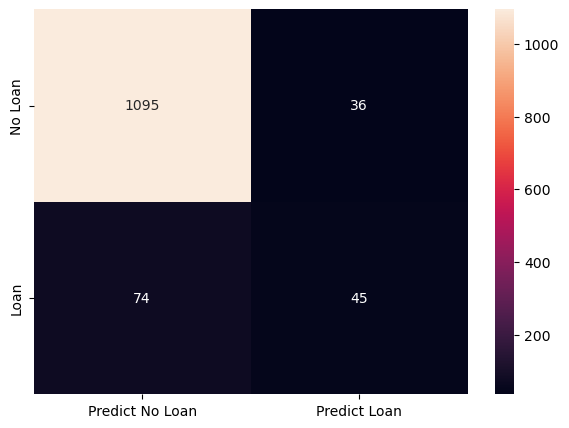

In [327]:
m = confusion_matrix(y_test, svc_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Loan","Loan"]],
                  columns = [i for i in ["Predict No Loan","Predict Loan"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()



#### Lets use KNN classification model and check model performance.

In [328]:
NNH_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [329]:
NNH_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [330]:
NNH_pred = NNH_model.predict(X_test)

In [331]:
print('With KNN model(K value 5), Accuracy on Training data:',NNH_model.score(X_train, y_train) )
print('With KNN model(K value 5), Accuracy on Test data:',NNH_model.score(X_test, y_test) )
print('With KNN model(K value 5), Accuracy is:',accuracy_score(y_test, NNH_pred) )


With KNN model(K value 5), Accuracy on Training data: 1.0
With KNN model(K value 5), Accuracy on Test data: 0.912
With KNN model(K value 5), Accuracy is: 0.912


In [332]:
print(classification_report(y_test, NNH_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1131
         1.0       0.56      0.38      0.45       119

    accuracy                           0.91      1250
   macro avg       0.75      0.67      0.70      1250
weighted avg       0.90      0.91      0.90      1250



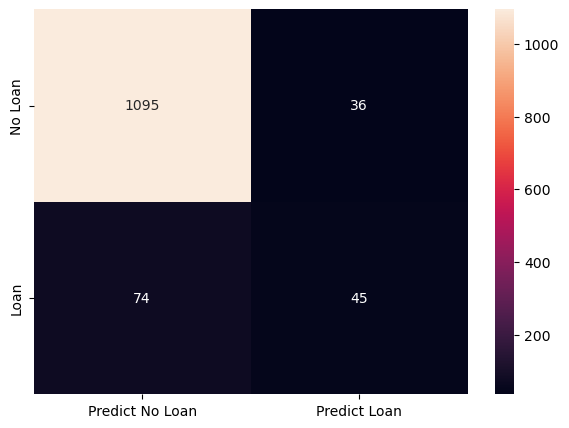

In [333]:
cm = confusion_matrix(y_test, NNH_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Loan","Loan"]],
                  columns = [i for i in ["Predict No Loan","Predict Loan"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

### Model performances
- Dataset is highly imbalanced with Label-0 as Majority class and Label-1 as Minority Class. We considered base model without SMOTE Balanced techniques applied.
- With Logistic Regression on base model, Accuracy is 94% and Recall at 58%
- With SVM(SVC) on base model, Accuracy is 95% and Recall at 55%
- With KNN(K value-5) on base model, Accuracy is 91% and Recall at 38%.
- It appears that Logistic Regression seems to be holding up well compared to other methods on base models. However lets try and attempt performance improvements on other methods and compare the results again.

#### Q.B.4.B Tune parameters for each of the models wherever required and finalize a model.

In [334]:
# Lets use the SMOTE Balanced Treatment dataset and re-evaluate the Model performance with SVC and KNN.
# Building a Support Vector Machine on the SMOTE Treated data
svc_model_sm = SVC(kernel='linear', gamma = 0.001, C = 10)
svc_model_sm.fit(X_train_sm, y_train_sm)
svc_tr_sm = svc_model.score(X_train_sm, y_train_sm)
svc_te_sm = svc_model.score(X_test_sm, y_test_sm)
svc_pred_sm = svc_model.predict(X_test_sm)



In [335]:
print('With SVM model, Accuracy on SMOTE Training data:',svc_model.score(X_train_sm, y_train_sm) )
print('With SVM model, Accuracy on SMOTE Test data:',svc_model.score(X_test_sm, y_test_sm) )

With SVM model, Accuracy on SMOTE Training data: 0.7966951903216288
With SVM model, Accuracy on SMOTE Test data: 0.7960176991150443


In [336]:
print(classification_report(y_test_sm, svc_pred_sm))

              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      1123
         1.0       0.98      0.60      0.75      1137

    accuracy                           0.80      2260
   macro avg       0.85      0.80      0.79      2260
weighted avg       0.85      0.80      0.79      2260



In [337]:
# Building a KNN model on SMOTE Treated data
NNH_model_sm = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [338]:
NNH_model_sm.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(weights='distance')

In [339]:
NNH_pred_sm = NNH_model.predict(X_test_sm)

In [340]:
print('With KNN model(K value 5), Accuracy on SMOTE Training data:',NNH_model.score(X_train_sm, y_train_sm) )
print('With KNN model(K value 5), Accuracy on SMOTE Test data:',NNH_model.score(X_test_sm, y_test_sm) )
print('With KNN model(K value 5), Accuracy is:',accuracy_score(y_test_sm, NNH_pred_sm) )


With KNN model(K value 5), Accuracy on SMOTE Training data: 0.8608734139864267
With KNN model(K value 5), Accuracy on SMOTE Test data: 0.8561946902654868
With KNN model(K value 5), Accuracy is: 0.8561946902654868


In [341]:
print(classification_report(y_test_sm, NNH_pred_sm))

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      1123
         1.0       0.98      0.73      0.84      1137

    accuracy                           0.86      2260
   macro avg       0.88      0.86      0.85      2260
weighted avg       0.88      0.86      0.85      2260



### Insights: Model performances with SMOTE Technique treated data:
- With Logistic Regression, Accuracy is 90% and Recall at 92%
- With SVM(SVC), Accuracy is 80% and Recall at 60%
- With KNN(K value-5) on base model, Accuracy is 86% and Recall at 73%.
- It appears that Logistic Regression seems to be holding up well compared to other methods on base models even with SMOTE Treated data. However lets try and attempt performance improvements using K_fold method and compare the results again.

#### Lets use K-Fold cross validation methods to improve performance

In [342]:
# Lets use K-Fold cross validation methods on base model(imbalanced data)
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=5)
SVM_model = SVC()

In [343]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM', SVM_model))

LR: 0.947390 (0.007693)
KNN: 0.912585 (0.008031)
SVM: 0.907787 (0.011750)


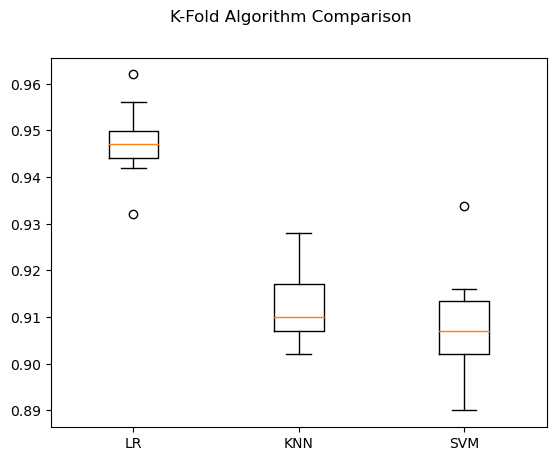

In [344]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compare using boxplot
fig = plt.figure()
fig.suptitle('K-Fold Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [345]:
# Lets use K-Fold Stratifield cross validation methods on base model(imbalanced data)
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=5)
SVM_model = SVC()

In [346]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM', SVM_model))

LR: 0.947988 (0.008009)
KNN: 0.914382 (0.005859)
SVM: 0.909182 (0.004211)


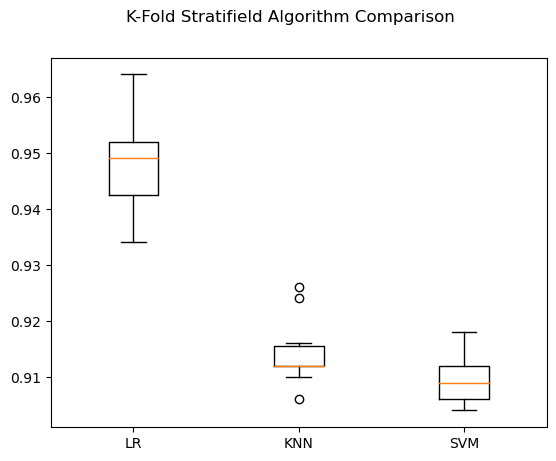

In [347]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('K-Fold Stratifield Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Lets use K-Fold Cross Validation methods on SMOT Treated data and compare performance

In [348]:
# Lets use K-Fold cross validation methods on SMOTE Treated data (balanced data)
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=5)
SVM_model = SVC()

In [349]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM', SVM_model))

LR: 0.890572 (0.011905)
KNN: 0.925881 (0.052710)
SVM: 0.869559 (0.045580)


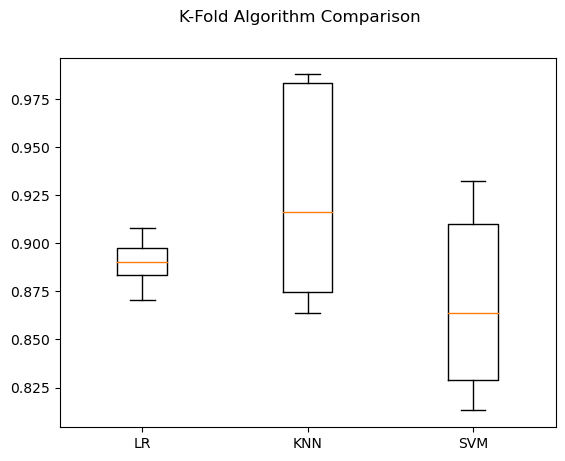

In [350]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_sm, y_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compare using boxplot
fig = plt.figure()
fig.suptitle('K-Fold Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.901749 (0.008318)
KNN: 0.931070 (0.007684)
SVM: 0.876412 (0.007963)


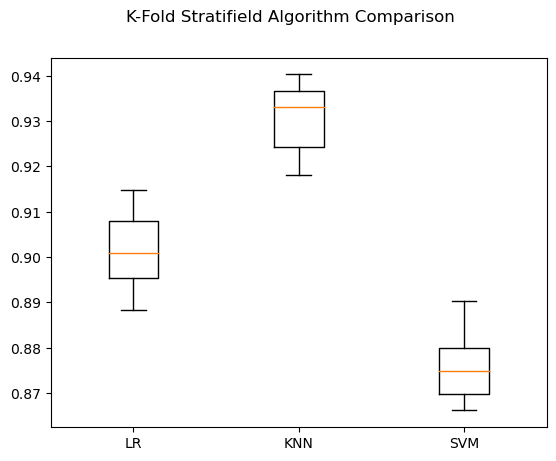

In [351]:
#Lets use K-Fold Stratifield methods.
# Lets use K-Fold cross validation methods on SMOTE Treated data (balanced data)
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=5)
SVM_model = SVC()
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM', SVM_model))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_sm, y_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('K-Fold Stratifield Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Lets try KNN model with different K values and evaluate the performance on balanced data(SMOTE Treated data):

In [352]:
#split into 75:25 ratio 
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 1)
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....29
for k in neighbors:
    #knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    
    knn.fit(X_train_sm, y_train_sm)
    # predict the response
    y_pred_sm = knn.predict(X_test_sm)
    # evaluate accuracy
    scores = accuracy_score(y_test_sm, y_pred_sm)
    print(f'The accuracy score with k value {k} is {accuracy_score(y_test_sm, y_pred_sm)}')
    print(classification_report(y_test_sm, y_pred_sm))
    print("\n")
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The accuracy score with k value 1 is 0.9446902654867256
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      1123
         1.0       0.91      0.98      0.95      1137

    accuracy                           0.94      2260
   macro avg       0.95      0.94      0.94      2260
weighted avg       0.95      0.94      0.94      2260



The accuracy score with k value 3 is 0.9353982300884955
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1123
         1.0       0.89      0.99      0.94      1137

    accuracy                           0.94      2260
   macro avg       0.94      0.94      0.94      2260
weighted avg       0.94      0.94      0.94      2260



The accuracy score with k value 5 is 0.9318584070796461
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      1123
         1.0       0.88      0.99      0.94      1137

    accura

#### Q.B.4.C Final Performance model
- Overall it was found from the experiments that using KNN model with K-values 1 and 3 on balanced data(SMOTE Treated data)seems to be good in terms of model accuracy at 94%. So recommend to use K-value:3 as it has slightly better Recall score(99%) compared to K-Value:1(98%) for minority class.
- Althogh Logistic Regression with K-Fold method on imbalanced data has comparible performance with KNN Regression model using Stratifield K-Fold method on balanced data(SMOTE), its recommended to use KNN Classifier using Stratifield K-Fold Method on balanced data(SMOTE Technique).


#### Q.B.4.D Performance characterizations and Conclusions:
- Used LR, KNN, SVC Methods on highly imbalanced data. Results favoured  LR model over the others but still it had low Recall and highly overfitting.
- Treated all imbalanced data using SMOTE Technique to convert to balanced data.
- Used LR, KNN, SVC Methods on balanced data. Resuts showed that Accuracy is good and see very good improvement on Recall score(on minority class) compared to previous imbalanced data.
- Used K-Fold Cross Validation Methods for LR, SVN and KNN on imbalanced data. It was noticed the accuracy of all the three models improved compared to earlier models.
- Used Stratifield K-Fold Cross Validation methods for LR, SVN, KNN on imbalanced method and there  was no noticeable performance compared default K-Fold CV method used earlier.
- Used Default K-Fold and Stratifield K-Fold Methods on balanced data(SMOTE Treated). It was noticed that KNN model showed good accuracy compared to other two LR, SVC models.
- Used KNN Classifier with K values(1 to 19 odd values) on balanced data(SMOTE Treated) and found the accuracy/f1-score/Recall score were better than all of the previous models.
- Finally its recommended to use KNN Model with K-Value 3 on balanced data as it has very good accuracy(93%), very good F1-Score and Recall score and is best fit model for current dataset..

#### Additional performance tweaking/tuning methods:

#### default kernel is rbf, {'C':[0.1, 0.9, 1,10,100], 'kernel':['rbf',radial', 'linear'], 'gamma':[1,0.1, 0.001]

In [353]:
# Building a Support Vector Machine on the SMOTE Treated data with C=1, gamma=0.1
svc_model_sm = SVC(kernel='linear', gamma = 0.1, C = 1)
svc_model_sm.fit(X_train_sm, y_train_sm)
svc_tr_sm = svc_model.score(X_train_sm, y_train_sm)
svc_te_sm = svc_model.score(X_test_sm, y_test_sm)
svc_pred_sm = svc_model.predict(X_test_sm)

In [354]:
print('With SVM model, Accuracy on SMOTE Training data:',svc_model.score(X_train_sm, y_train_sm) )
print('With SVM model, Accuracy on SMOTE Test data:',svc_model.score(X_test_sm, y_test_sm) )
print(classification_report(y_test_sm, svc_pred_sm))

With SVM model, Accuracy on SMOTE Training data: 0.7966951903216288
With SVM model, Accuracy on SMOTE Test data: 0.7960176991150443
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      1123
         1.0       0.98      0.60      0.75      1137

    accuracy                           0.80      2260
   macro avg       0.85      0.80      0.79      2260
weighted avg       0.85      0.80      0.79      2260



In [355]:
# Building a Support Vector Machine on the SMOTE Treated data with C=0.1, gamma=1
svc_model_sm = SVC(kernel='linear', gamma = 1, C = 0.1)
svc_model_sm.fit(X_train_sm, y_train_sm)
svc_tr_sm = svc_model.score(X_train_sm, y_train_sm)
svc_te_sm = svc_model.score(X_test_sm, y_test_sm)
svc_pred_sm = svc_model.predict(X_test_sm)

print('With SVM model, Accuracy on SMOTE Training data:',svc_model.score(X_train_sm, y_train_sm) )
print('With SVM model, Accuracy on SMOTE Test data:',svc_model.score(X_test_sm, y_test_sm) )
print(classification_report(y_test_sm, svc_pred_sm))

With SVM model, Accuracy on SMOTE Training data: 0.7966951903216288
With SVM model, Accuracy on SMOTE Test data: 0.7960176991150443
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      1123
         1.0       0.98      0.60      0.75      1137

    accuracy                           0.80      2260
   macro avg       0.85      0.80      0.79      2260
weighted avg       0.85      0.80      0.79      2260



#### With C=1, gamma=0.1 and C=0.1, gamma=1, C=10, gamma = 0.001, C = 10 we tried SVC models. All models underperfomed compared to KNN and LR Models interms of Accuracy and Recall. SVC is not a good choice.

###    ******************************* END OF SUL PROJECT ********************************